# Algorithmic Trading - Avellaneda-Stoikov Model

## Student: Berke ASLAN, A5-IF ESILV

This jupyter notebook is the final output of the AS model project. The cells will compute the methods coded in the AvellanedaStoikov.py file, created and developed in PyCharm. 

### Market assumptions

We assume that we are a market-maker at the New York Stock Exchange, where trading hours are between 9:30 AM and 4:00 PM, and that time is discretized with a one-second resolution. So, t = 0 refers to 9:30AM, t = 60 to 9:31 AM, and t = 6.5⇥3600 to 4:00 PM. We denote by T = 6.5⇥3600 the number of seconds (time steps) in one day of trading. Thus t runs from 0 to T.

### Model parameters

- T = 6.5 * 3600
- A = 0.05
- S0 = 20
- sigma = S0 * 0.02/sqrt(T)
- k = log(2) / 0.01
- q_tilde = 100
- gamma = 0.01/q_tilde

### Package importing

In this project, we will only use simple python packages for mathematical operations (like sqrt, log...), data manipulation and simulations (such as uniform, normal and poisson processes).

In [1]:
import math
import random
import pandas as pd
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt
from AvellanedaStoikov import AvellanedaStoikov

### Question 1

The code can be found in the AvellanadaStoikov.py file.

### Question 2

For both the trivial model (using delta = 0.03) and the AS model, output the three following plots, for one realization of the processes, with time 0 <= t <= T on the x axis: (a) the stock price st, (b) deltatb, deltata, deltatb + deltata (all three on the same plot), (c) stock inventory qt, (d) cumulative pnl (pnlt).

To have a better view, we plot the fair price and the deltas on the same plot.

#### Trivial model (delta = 0.03)

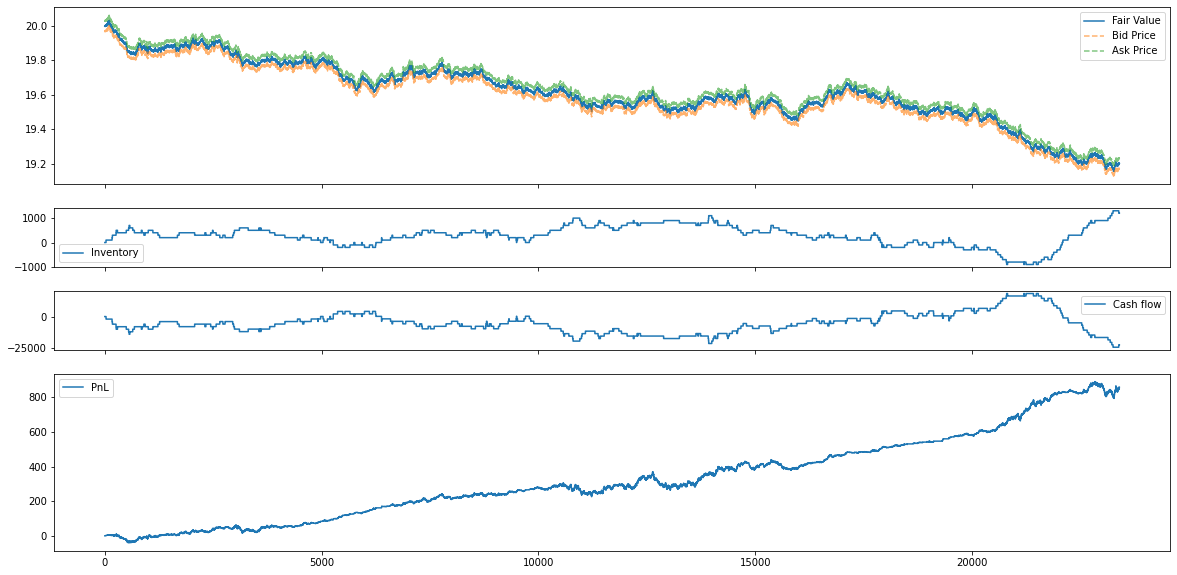

In [4]:
AS = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='Trivial')

AS.setTrivialDeltaValue(0.03)
AS.execute()
AS.visualize()

#### AS model

We see in the following model that the PnL has almost a linear form with less volatility when compared to the trivial model.

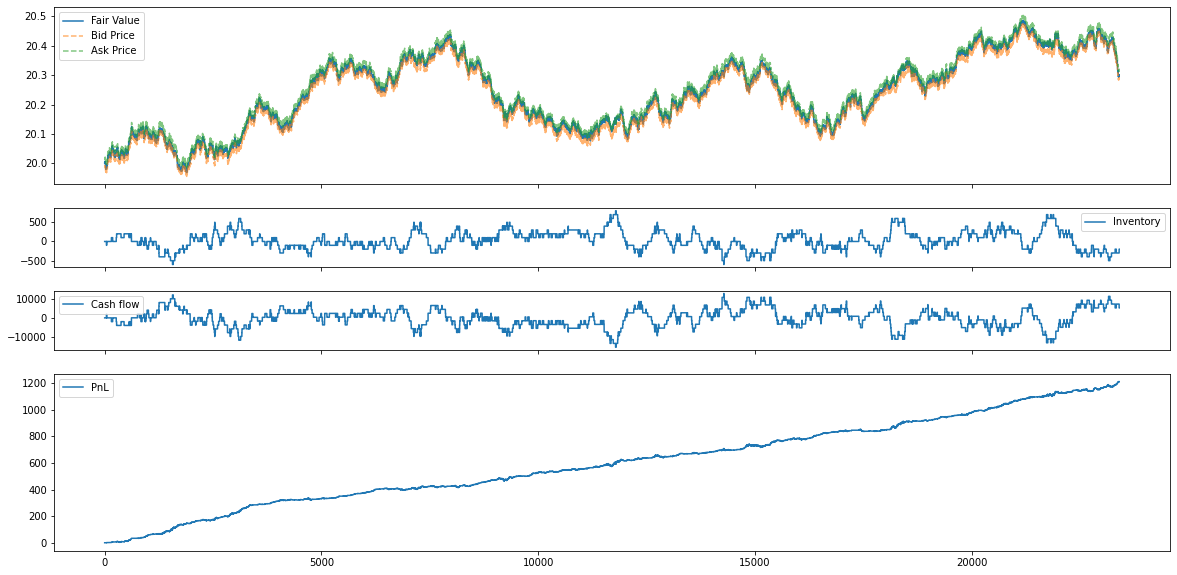

In [3]:
AS = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='AS')

AS.execute()
AS.visualize()

### Question 3

For the trivial model, compute μ_pnl, sigma_pnl, SR, and SUMq for each value of delta = 0.005, 0.01, 0.02, 0.03, 0.04, 0.05. For the AS model, compute the same quantities. Throughout these simulations, we'll take **N=500**. The simulation of this model is called "Baseline", as we won't experience jumps in the price of the underlying in this part of the project. 

Question 5 covers the same as Question 3, with a 5%-jump introduced at mid-point.

In [2]:
columns = ['mean', 'sigma', 'sharpe', 'sumq']
simulationPnL_df = pd.DataFrame(columns=columns)
print(simulationPnL_df)

Empty DataFrame
Columns: [mean, sigma, sharpe, sumq]
Index: []


In [6]:
%%time

trivial_list = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
pnl_list = []
simulationPnL_df = pd.DataFrame()
N = 500
T = 6.5*3600

#### Create a function to calculate sum q square (last column of dataframe) ####

def sum_q(orders, N, T):
    """
    Method to define the formula regarding the positions given on the paper.
    """
    const = 1 / (N * T)
    q_sum_sq = 0
    q_sum = 0
    
    # First element
    for i in range(int(T)):
        for j in range(N):
            q_sum_sq = q_sum_sq + orders[j][i] ** 2
            
            
    # Second element
    for i in range(int(T)):
        for j in range(N):
            q_sum = q_sum + orders[j][i]
            
    return np.sqrt(const * q_sum_sq - (const * q_sum) ** 2)

# Get the model
AS_trivial = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='Trivial')

# For all the trivial values
for trivial_value in trivial_list:
    
    AS_trivial.setTrivialDeltaValue(trivial_value)
    current_delta_pnls = []
    current_delta_q = []
    
    # For the number of simulations given
    for i in range(N):
        
        # Append the list with the PnL value
        AS_trivial.execute()
        current_delta_pnls.append(AS_trivial.getFinalPnL())
        current_delta_q.append(AS_trivial.getOrders())
        
    # Calculate pos formula
    pos = sum_q(current_delta_q, N, T)
    
    # Now store all averages of the lists in a dataframe, to be appended in the simulation df 
    current_pnls_df = pd.DataFrame({'mean': np.round(np.mean(current_delta_pnls),2),
                                    'sigma': np.round(np.std(current_delta_pnls),2),
                                    'sharpe': np.round(np.mean(current_delta_pnls) / np.std(current_delta_pnls),2),
                                    'sumq': np.round(pos,2)}, index=[0])
        
    simulationPnL_df = simulationPnL_df.append(current_pnls_df, ignore_index=True)

    
    
# One last for the AS Model to append
AS = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='AS')
current_delta_pnls = []
current_delta_q = []

for i in range(N):
        
    # Append the list with the PnL value
    AS.execute()
    current_delta_pnls.append(AS.getFinalPnL())
    current_delta_q.append(AS.getOrders())
    
# Calculate pos formula
pos = sum_q(current_delta_q, N, T)
    
# Now store all averages of the lists in a dataframe, to be appended in the simulation df 
current_pnls_df = pd.DataFrame({'mean': np.round(np.mean(current_delta_pnls),2),
                                'sigma': np.round(np.std(current_delta_pnls),2),
                                'sharpe': np.round(np.mean(current_delta_pnls) / np.std(current_delta_pnls),2),
                                'sumq': np.round(pos,2)}, index=[0])

# Append the statistics for the AS model
simulationPnL_df = simulationPnL_df.append(current_pnls_df, ignore_index=True)

# Reset indexes with proper values
indexes = ['Trivial Delta = 0.005', 'Trivial Delta = 0.01', 'Trivial Delta = 0.02',
          'Trivial Delta = 0.03', 'Trivial Delta = 0.04', 'Trivial Delta = 0.05', 'AS Model']

simulationPnL_df.index = indexes

# Display final dataframe
simulationPnL_df

CPU times: user 19min 19s, sys: 6.6 s, total: 19min 25s
Wall time: 19min 39s


,mean,sigma,sharpe,sumq
Trivial Delta = 0.005,781.19,1119.22,0.70,2757.96
Trivial Delta = 0.01,1093.69,958.72,1.14,2357.00
Trivial Delta = 0.02,1134.31,614.46,1.85,1644.20
Trivial Delta = 0.03,863.99,474.90,1.82,1173.37
Trivial Delta = 0.04,584.15,337.47,1.73,860.22
Trivial Delta = 0.05,364.88,255.72,1.43,614.91
AS Model,1205.38,88.82,13.57,210.48


### Question 4

### Case study: baseline model

The trivial model, for various values of delta (0.5%, 1%, 2%, 3%, 4% and %5), for a computation number of 500, has a worse performance compared to the AS model.

Let's deepdive into the different statistical measures of the model and analyze the results across the trivial models and AS model:

- **Mean**: the trivial model of 0.5% delta has a relatively low average PnL. We can see that with 1% and 2%, the average PnL increases and starts to decrease as our delta increases to 3%, 4% and finally 5%. The AS model has a fairly good average PnL of approximately **1204.29**, beating all trivial models **except for the 2%**. So if the trivial model with 2% delta can have a greater average PnL than the AS model, what makes it more robust? The answer is hidden in the standard deviation of the PnL and the standard deviation of *qt*, across the trading day and across realizations. 

- **Standard deviation**: the analysis in this case is pretty straight forward, when we look at the result table of computations, for the trivial model, as delta increases, the standard deviation of the PnL decreases. For a trivial **delta of 0.5%**, we have a std of **1049.84**, while for a **trivial delta of 5%**, the std decrases to **251.99**, a ***decrease of 76%***. The **AS model** on the other hand, has a **much lower standard deviaton, of 89.43**. Comparing the mean and std of these two best-performing models when it comes to average PnL (AS model and Trivial model of 2% delta), we can see that the AS model can get about the same PnL as the trivial delta, but with a MUCH lower standard dev, i.e. lower risk and lower stress.

- **Sharpe**: as the Sharpe ratio is the simple division of the mean by the std, the results are not suprising. AS model's Sharpe is way bigger than the trivial delta models. On this statistical metric, we can conclude that the AS model is highly efficient of producing a relatively high average PnL with a low risk, compared to the trivial models. 

- **Standard deviation of qt**: the pattern of the standard deviation across realizations is fairly similar to the standard deviation of PnLs: as trivial delta increases, std(qt) decreases. However, the difference between the AS model and the trivial model is obvious: AS model has a much lower std(qt) compared to the trivial model. **Our inventory in the AS model is more stable compared to the trivial model**. This can also be seen from the two (trivial and AS) graphs posted as examples. 

### Question 5

Same as Question 3 with a 5%-jump introduced in the middle of the time horizon [0, T]. Let's first check to ***setJumps*** method we introduced in PyCharm, to see if it works correctly.

We introduce a 5%-jump and graph it to see the an example scenario.

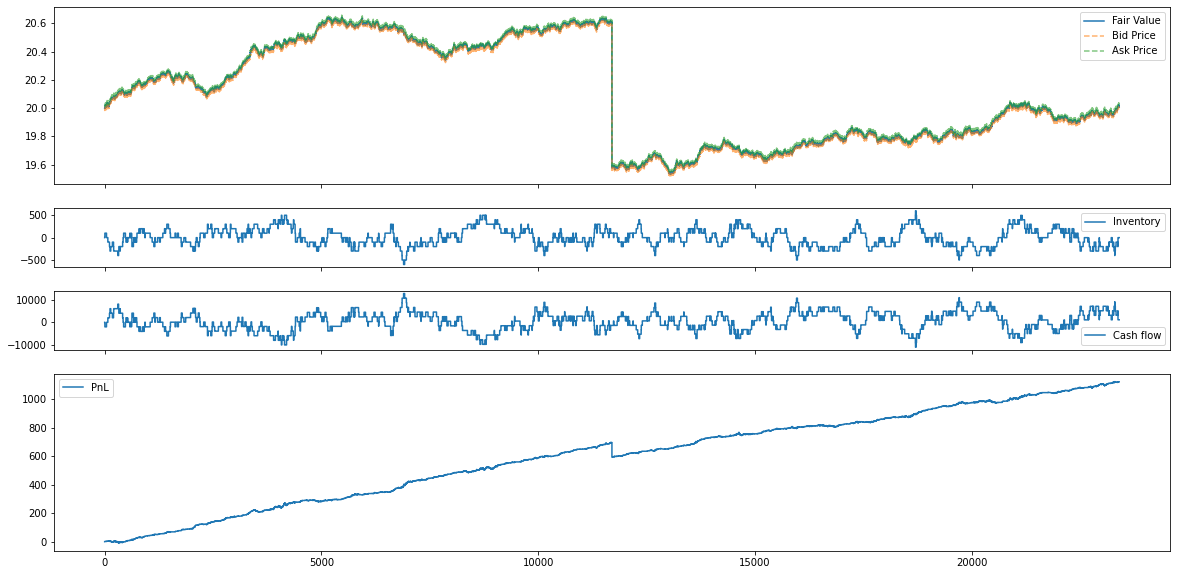

In [12]:
random.seed(100)

AS = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='AS')

# Introducing a  jump of 50%, mid-way
AS.setJump(jump=-0.05)

AS.execute()
AS.visualize()

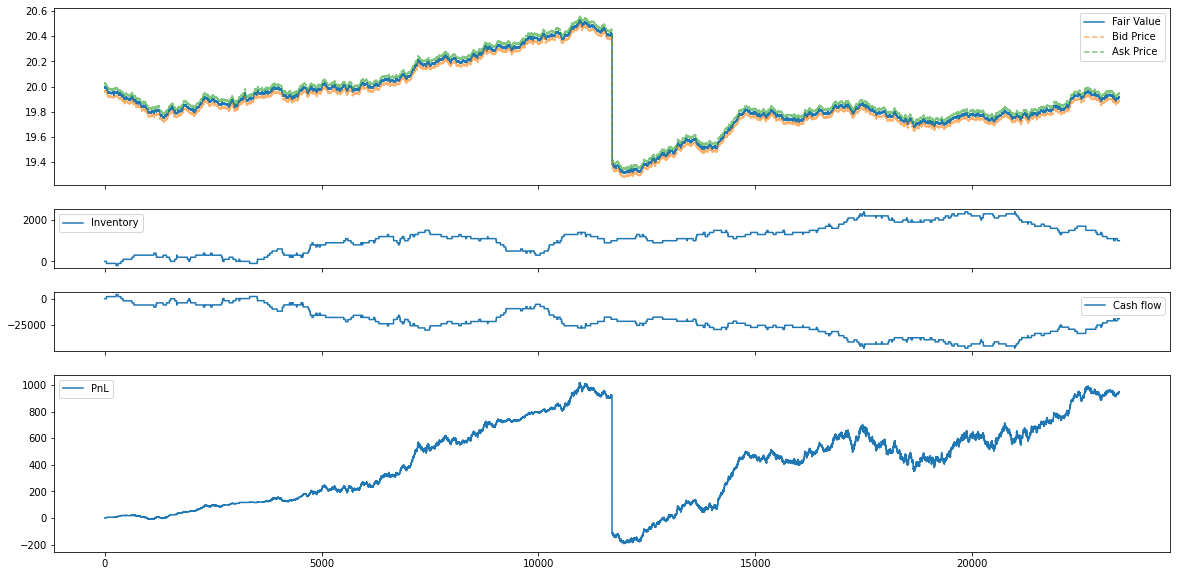

In [4]:
random.seed(100)

AS_trivial = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='Trivial')

# Introducing a  jump of 50%, mid-way
AS_trivial.setJump(jump=-0.05)

AS_trivial.setTrivialDeltaValue(0.03)
AS_trivial.execute()
AS_trivial.visualize()

Even before running the 500 scenarios, we can clearly see that the AS model is much more robust to price jumps than the trivial model. For both models, a 5% negative jump was introduced in a scenario; the PnL **loss generated for the trivial model was more than 1100** at the time of the jump, while for the AS model, the **loss generated was roughly 200**. 

Let's now run the 500 scenarios and check the results of the statistical metrics.

In [8]:
%%time

trivial_list = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
pnl_list = []
simulationPnL_df = pd.DataFrame()
N = 500
T = 6.5*3600

#### Create a function to calculate sum q square (last column of dataframe) ####

def sum_q(orders, N, T):
    """
    Method to define the formula regarding the positions given on the paper.
    """
    const = 1 / (N * T)
    q_sum_sq = 0
    q_sum = 0
    
    # First element
    for i in range(int(T)):
        for j in range(N):
            q_sum_sq = q_sum_sq + orders[j][i] ** 2
            
            
    # Second element
    for i in range(int(T)):
        for j in range(N):
            q_sum = q_sum + orders[j][i]
            
    return np.sqrt(const * q_sum_sq - (const * q_sum) ** 2)

# Get the model
AS_trivial = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='Trivial')

# Introduce the negative 5%-jump
AS_trivial.setJump(jump=-0.05)

# For all the trivial values
for trivial_value in trivial_list:
    
    AS_trivial.setTrivialDeltaValue(trivial_value)
    current_delta_pnls = []
    current_delta_q = []
    
    # For the number of simulations given
    for i in range(N):
        
        # Append the list with the PnL value
        AS_trivial.execute()
        current_delta_pnls.append(AS_trivial.getFinalPnL())
        current_delta_q.append(AS_trivial.getOrders())
        
    # Calculate pos formula
    pos = sum_q(current_delta_q, N, T)
    
    # Now store all averages of the lists in a dataframe, to be appended in the simulation df 
    current_pnls_df = pd.DataFrame({'mean': np.round(np.mean(current_delta_pnls),2),
                                    'sigma': np.round(np.std(current_delta_pnls),2),
                                    'sharpe': np.round(np.mean(current_delta_pnls) / np.std(current_delta_pnls),2),
                                    'sumq': np.round(pos,2)}, index=[0])
        
    simulationPnL_df = simulationPnL_df.append(current_pnls_df, ignore_index=True)
    
    
# One last for the AS Model to append
AS = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='AS')
# Introduce the negative 5%-jump
AS.setJump(jump=-0.05)

current_delta_pnls = []
current_delta_q = []

for i in range(N):
        
    # Append the list with the PnL value
    AS.execute()
    current_delta_pnls.append(AS.getFinalPnL())
    current_delta_q.append(AS.getOrders())
    
# Calculate pos formula
pos = sum_q(current_delta_q, N, T)
    
# Now store all averages of the lists in a dataframe, to be appended in the simulation df 
current_pnls_df = pd.DataFrame({'mean': np.round(np.mean(current_delta_pnls),2),
                                'sigma': np.round(np.std(current_delta_pnls),2),
                                'sharpe': np.round(np.mean(current_delta_pnls) / np.std(current_delta_pnls),2),
                                'sumq': np.round(pos,2)}, index=[0])

# Append the statistics for the AS model
simulationPnL_df = simulationPnL_df.append(current_pnls_df, ignore_index=True)

# Reset indexes with proper values
indexes = ['Trivial Delta = 0.005', 'Trivial Delta = 0.01', 'Trivial Delta = 0.02',
          'Trivial Delta = 0.03', 'Trivial Delta = 0.04', 'Trivial Delta = 0.05', 'AS Model']

simulationPnL_df.index = indexes

# Display final dataframe
simulationPnL_df

CPU times: user 17min 43s, sys: 1.05 s, total: 17min 45s
Wall time: 17min 45s


,mean,sigma,sharpe,sumq
Trivial Delta = 0.005,777.40,2971.82,0.26,2728.76
Trivial Delta = 0.01,1067.00,2567.41,0.42,2358.97
Trivial Delta = 0.02,1288.06,1935.44,0.67,1776.81
Trivial Delta = 0.03,992.65,1333.79,0.74,1263.61
Trivial Delta = 0.04,646.44,994.02,0.65,900.90
Trivial Delta = 0.05,300.03,641.71,0.47,599.27
AS Model,1215.49,244.01,4.98,208.95


### Case study: 5% jump scenario

Now that we have the statistical results from the tables, we can compare them. The question that arises is the following: **which model is more robust to jumps in the underlying? Which model can protect their average/std PnL, Sharpe, and std(qt) better?**

- **Mean**: for our 500 scenarios, only the 2% trivial delta and AS model have out-performed the baseline case when it comes to average PnL. All other models, i.e. trivial delta of 0.5%, 1%, 3%, 4% and 5% have decreased in average PnL. 

- **Standard deviation**: similar to the baseline case, we can still observe a decrease in the standard deviation of the PnL, as trivial delta increases. The difference however between the standard deviations are greater, therefore, it shows us how much it is important for the market-maker to use the right model to protect themselves during a jump scenario. The **worst performing model is the trivial delta of 0.5%, with a standard dev** of **2971.82**. Like the baseline case, the **best performing model here is the AS model with a standard deviation** of the PnL equal to **244.01**. 

- **Sharpe**: once again, like the baseline case, as the Sharpe ratio is the simple division of the mean by the std, the results are not suprising. AS model's Sharpe is way bigger than the trivial delta models. On this statistical metric, we can conclude that the AS model is highly efficient of producing a relatively high average PnL with a low risk, compared to the trivial models. However most importantly, the proportion between Sharpe(AS Model) and Sharpe(Trivials) are greater in the jump case compared to the baseline case: e.g. **4.98 (AS) vs 0.47 (5% trivial) jump case compared to 13.46 (AS) vs 1.53 (trivial 5%)**. *Choosing the right model during a jump scenario is therefore highly important to the market maker, as it will make a bigger difference*.

- **Standard deviation of qt**: all of the statements wrote for the baseline model are valid in the jump case as well. However, looking at the results, we cannot conclude a particular impact on the std(qt) between the two cases. The results look fairly similar. 

### Question 6

In this question, we introduce the notion of adverse selection. This refers to the situation where a fraction of our counterparties trade using a short-term forecast that has some accuracy. This means that, if their forecast says the stock price will go up in, say, 15 minutes, they will buy, not sell, the stock from us; and conversely if the forecast says the stock price will go down, they will sell to, not buy from, us. 

After modifying our code from PyCharm, let's once again graph the model for an example case and see how the PnL varies during the day.


### Adverse selection in Trivial Model

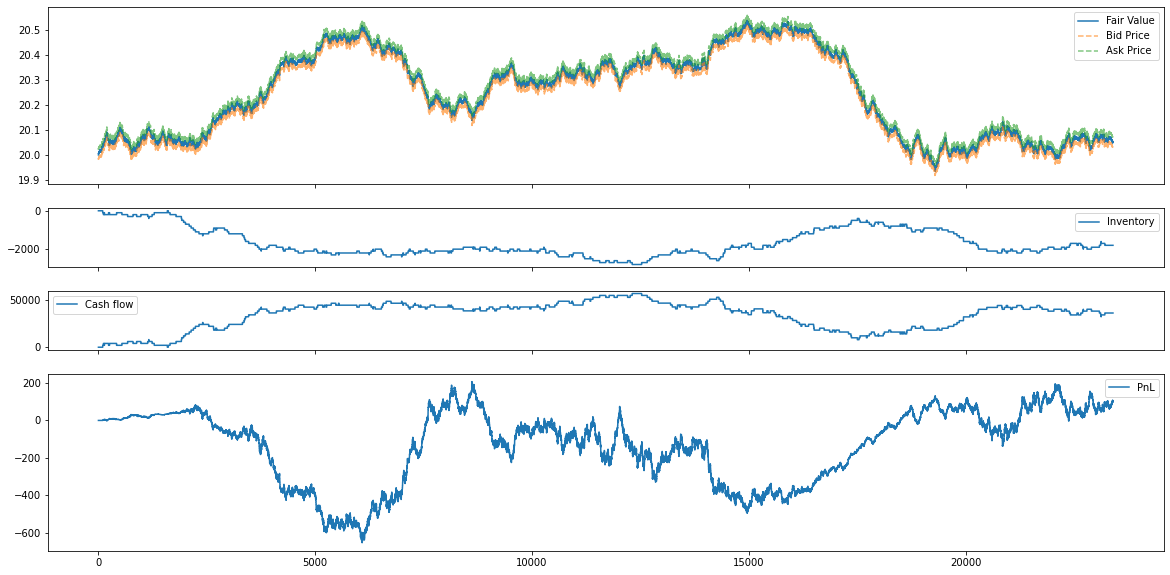

In [7]:
AS_trivial = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='Trivial')

# Here we include the Adverse Selection model
AS_trivial.activateAdverseSelection(True)

AS_trivial.setTrivialDeltaValue(0.02)
AS_trivial.execute()
AS_trivial.visualize()

### Adverse selection in AS model

Here, we can see that **there is actually a short-term adverse selection, but no long-term adverse selection.**

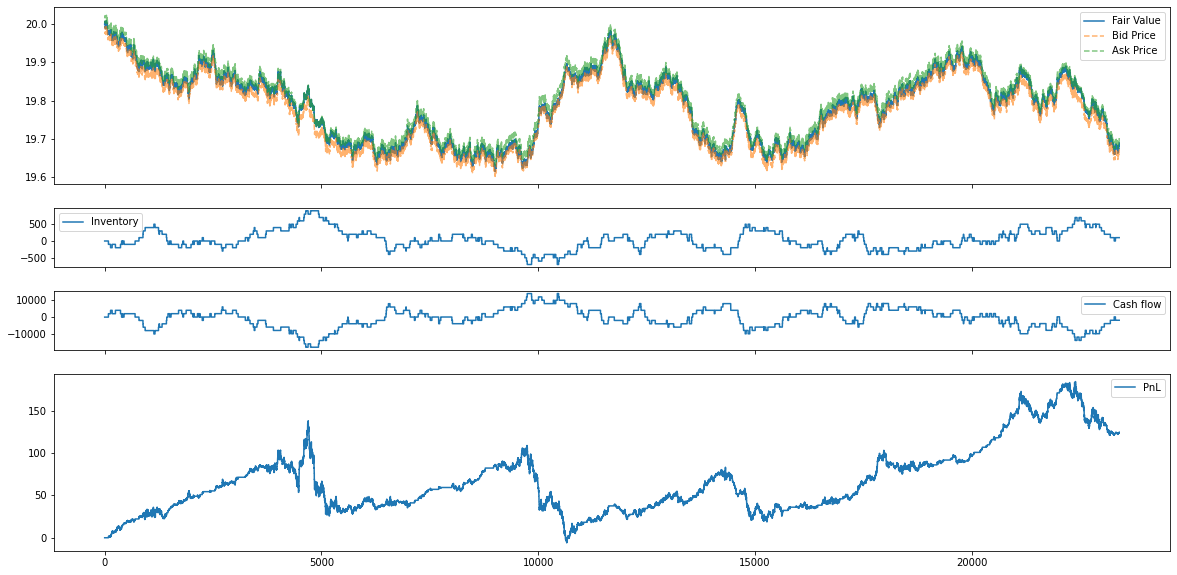

In [2]:
AS = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='AS')

# Here we include the Adverse Selection model
AS.activateAdverseSelection(True)

AS.execute()
AS.visualize()

In [9]:
%%time
import math
import pandas as pd
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt
from AvellanedaStoikov import AvellanedaStoikov

trivial_list = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
pnl_list = []
simulationPnL_df = pd.DataFrame()
N = 500
T = 6.5*3600

#### Create a function to calculate sum q square (last column of dataframe) ####

def sum_q(orders, N, T):
    """
    Method to define the formula regarding the positions given on the paper.
    """
    const = 1 / (N * T)
    q_sum_sq = 0
    q_sum = 0
    
    # First element
    for i in range(int(T)):
        for j in range(N):
            q_sum_sq = q_sum_sq + orders[j][i] ** 2
            
            
    # Second element
    for i in range(int(T)):
        for j in range(N):
            q_sum = q_sum + orders[j][i]
            
    return np.sqrt(const * q_sum_sq - (const * q_sum) ** 2)

# Get the model
AS_trivial = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='Trivial')

# Here we include the Adverse Selection model
AS_trivial.activateAdverseSelection(True)

# For all the trivial values
for trivial_value in trivial_list:
    
    AS_trivial.setTrivialDeltaValue(trivial_value)
    current_delta_pnls = []
    current_delta_q = []
    
    # For the number of simulations given
    for i in range(N):
        
        # Append the list with the PnL value
        AS_trivial.execute()
        current_delta_pnls.append(AS_trivial.getFinalPnL())
        current_delta_q.append(AS_trivial.getOrders())
        
    # Calculate pos formula
    pos = sum_q(current_delta_q, N, T)
    
    # Now store all averages of the lists in a dataframe, to be appended in the simulation df 
    current_pnls_df = pd.DataFrame({'mean': np.round(np.mean(current_delta_pnls),2),
                                    'sigma': np.round(np.std(current_delta_pnls),2),
                                    'sharpe': np.round(np.mean(current_delta_pnls) / np.std(current_delta_pnls),2),
                                    'sumq': np.round(pos,2)}, index=[0])
        
    simulationPnL_df = simulationPnL_df.append(current_pnls_df, ignore_index=True)
    
    
# One last for the AS Model to append
AS = AvellanedaStoikov(S0=20,
                       T=6.5*3600,
                       model='AS')

# Here we include the Adverse Selection model
AS.activateAdverseSelection(True)

current_delta_pnls = []
current_delta_q = []

for i in range(N):
        
    # Append the list with the PnL value
    AS.execute()
    current_delta_pnls.append(AS.getFinalPnL())
    current_delta_q.append(AS.getOrders())
    
# Calculate pos formula
pos = sum_q(current_delta_q, N, T)
    
# Now store all averages of the lists in a dataframe, to be appended in the simulation df 
current_pnls_df = pd.DataFrame({'mean': np.round(np.mean(current_delta_pnls),2),
                                'sigma': np.round(np.std(current_delta_pnls),2),
                                'sharpe': np.round(np.mean(current_delta_pnls) / np.std(current_delta_pnls),2),
                                'sumq': np.round(pos,2)}, index=[0])

# Append the statistics for the AS model
simulationPnL_df = simulationPnL_df.append(current_pnls_df, ignore_index=True)

# Reset indexes with proper values
indexes = ['Trivial Delta = 0.005', 'Trivial Delta = 0.01', 'Trivial Delta = 0.02',
          'Trivial Delta = 0.03', 'Trivial Delta = 0.04', 'Trivial Delta = 0.05', 'AS Model']

simulationPnL_df.index = indexes

# Display final dataframe
simulationPnL_df

CPU times: user 21min 33s, sys: 4.1 s, total: 21min 38s
Wall time: 21min 46s


,mean,sigma,sharpe,sumq
Trivial Delta = 0.005,-1078.89,1250.44,-0.86,3372.87
Trivial Delta = 0.01,-390.71,948.48,-0.41,2489.94
Trivial Delta = 0.02,-20.43,704.01,-0.03,1607.25
Trivial Delta = 0.03,161.36,399.49,0.40,959.83
Trivial Delta = 0.04,168.83,246.76,0.68,651.01
Trivial Delta = 0.05,124.65,165.52,0.75,432.32
AS Model,222.06,123.14,1.80,264.66


### Case study: Adverse selection

In the case of the adverse selection model, the question that arises is the following: **which model is more robust to alpha traders? Which model can protect their average/std PnL, Sharpe, and std(qt) better from forecasts made by alpha traders?**

- **Mean**: the adverse selection case is perhaps the most interesting one to comment on. The average PnL across 0.5%, 1% and 2% trivial deltas are all negative, which is worrying for the market maker. For 500 scenarios, we can see that the 3%, 4% and 5% trivial cases did not perform too badly, but the winner is the AS model with an average PnL of *226.06*. When analyzing the graph for trivial delta and AS model, we can see that the trivial delta has randomness, whereas the AS model has an upward trend. We can simply say that there is short-term adverse selection (as for our h = 15mins) but not long-term adverse selection (effect of negative and positive alphas).

- **Standard deviation**: similar to the baseline case, we can still observe a decrease in the standard deviation of the PnL, as trivial delta increases. The **worst performing model is the trivial delta of 0.5%, with a standard dev** of **1250.44**. Like the baseline case, the **best performing model here is the AS model with a standard deviation** of the PnL equal to **123.14**. 

- **Sharpe**: as the average PnL across 0.5%, 1% and 2% trivial deltas are all negative, naturally, the sharpe ratios for these models are also negative. What's noteworthy on our statistics table is that the AS model has more than double the Sharpe compared to the second best model, which is the 5% delta. 

- **Standard deviation of qt**: all of the statements wrote for the baseline model/jump are valid in the adverse selection case as well.

As for the adverse selection case, the market-maker accepts that there is an accurate forecast that is made by alpha traders. The PnL generated during the adverse selection case is less than the previous cases, which is understandable because the alpha-traders almost-surely make money. 

### Question 7: Comparing trivial/AS model across different cases

Until the now, we have seen three different cases: 
- baseline model
- jump case with a -5% jump at mid-day
- adverse selection, where alpha traders have forecasts on the traded underlying

These cases, starting from the baseline, all have different purposes to demonstrate how the AS model outperforms the trivial delta case. The jump case scenario for example helps us study the effect of a jump that would have on the PnL of a market maker: jumps do not happen every day, but when it happens, as we might call it a crisis scenario, a market maker with a robust model that sets the spread could have a lot more survival chances than a market maker with no model whatsoever (trivial case). For adverse selection, which is a realistic case, what effect would the assumption of having alpha-traders as clients have on market-makers with simple models vs. more sophisticated models (like AS)? An alpha-trader's win is a market-makers loss, but how could a market-maker minimize its losses when facing alpha-traders?

- **Mean**: let's first compare the average PnL between the **baseline case and the jump case**. The average PnL between these two cases look pretty similar, which is expected. The negative jump might have both a positive and negative effect on the market-maker's PnL: in fact, it depends on our inventory. For example, if a market-maker detains a positive amount of the underlying at mid-day, when the jump happens, the market-maker will surely lose PnL. However, if the jump is positive, it will surely make some money. Using some intuition, let's say that the market-maker has 500 stocks of the underlying, bought at an average fair price of 13.5. If the jump is positive and sends the fair price to 17.5, the market-maker (assuming a low-volatility) will surely make money. Therefore for a large amount of scenarios, the **utility of the AS model is not seen on the average, but it will surely appear in the analysis of std and Sharpe ratio**. In the case of **adverse selection**, the **market-maker simply accepts the forecast by alpha-traders**, therefore we have a **significant PnL loss compared to the two previous cases**, however, the 0.5%, 1% and 2% models have negative PnL, which is an unseen in the previous case studies.

- **Standard deviation**: unlike the average PnL statistic, for the standard deviation, the effect of the jump compared to the baseline model is obvious: when there is a jump happening in the market, the models perform highly similar PnLs, but at what cost? Looking at the volatility of the PnLs, we can see that the AS model have a significantly lower volatility compared to the other trivial models that are performing similar PnL. Therefore, the utility of the AS model is more visible when looking at the standard deviation across cases. For the **adverse selection case, the volatility of PnLs (123.14) is somewhere between the volatility of PnLs for both baseline case (88.82) and jump case (244.01)**.

- **Sharpe**: as the sharpe ratio is merely the division between the two latter statistics, the results are not complicated to think: In the baseline case, we have relatively high sharpe ratio as no game-changers happen in the market. However when introducing the jump-case, the sharpe ratios naturally decrease with an increased standard deviation of PnLs, but the AS model proportionally protects its sharpe better when compared to all trivial cases. As for the adverse selection case, the sharpe ratios are lower due to a lower average PnLs and a slighlty higher sigmas.

- **Standard deviation of qt**: no apparent effects between baseline case and the jump case, however for the adverse selection model, as alpha-traders have accurate forecasts, the inventory is more volatile.

To conclude, looking at these statistical measures, we can say that the AS model is more robust in many realistic-cases that affect the market and the market-maker. 

### Question 8: Liquidity measure with real market data



In [11]:
real_market_data = pd.read_csv("CVX.csv", header=None)
real_market_data.columns = ['0', '1', 'best_bid', 'best_bid_size', 'best_ask', 'best_ask_size']

# Looking at data structure
real_market_data

,0,1,best_bid,best_bid_size,best_ask,best_ask_size
0,40603,34222,104.17,14,104.24,3
1,40603,34223,104.16,8,104.24,1
2,40603,34224,104.16,3,104.25,29
3,40603,34225,104.16,1,104.25,29
4,40603,34226,104.15,6,104.25,29
...,...,...,...,...,...,...
521256,40632,57904,108.08,13,108.10,7
521257,40632,57905,108.08,13,108.10,7
521258,40632,57906,108.08,13,108.10,7
521259,40632,57907,108.08,13,108.10,7


In [16]:
# Only choosing columns of our interest
real_market_data = real_market_data[['best_bid', 'best_ask']]
real_market_data['spread'] = real_market_data['best_ask'] - real_market_data['best_bid']

real_market_data

,best_bid,best_ask,spread
0,104.17,104.24,0.07
1,104.16,104.24,0.08
2,104.16,104.25,0.09
3,104.16,104.25,0.09
4,104.15,104.25,0.10
...,...,...,...
521256,108.08,108.10,0.02
521257,108.08,108.10,0.02
521258,108.08,108.10,0.02
521259,108.08,108.10,0.02


In [20]:
average_spread = np.mean(real_market_data['spread'])
print('Average spread is: ', round(average_spread, 4))
print('Liquidity k = ', 2 / average_spread)

Average spread is:  0.0233
Liquidity k =  85.86321804361734


In [25]:
# Liquidity used in (8)
print('Liquidity k (used in equation (8))= ', math.log(2)/0.01)

Liquidity k (used in equation (8))=  69.31471805599453


As we can see from the results above, the liquidity is the same order for the equation (8) and the empirical one extracted from the CVX file. 

The log(2) can be interpreted as the following: in our case study, we would like the the liquidity coefficent to be consistent with the average spread formulated. In that case, as per equation (12), liquidity is inversely correlated with the average. 

The CVX spread liquidity is greater because the average is smaller.